Average Best Solution: [ 52.49485128  23.35865567  42.77342596 143.96127798]
Average Best Optimal: 0.25298571373604967
Average Best Optimal History: [-0.03917517  0.01032908  0.04626006  0.05883117  0.07760533  0.09052045
  0.09696903  0.10347422  0.11593185  0.12320487  0.13422462  0.13805182
  0.14006019  0.14650913  0.15167963  0.1596686   0.15972017  0.15992455
  0.16603975  0.16988228  0.16988228  0.17257757  0.17982367  0.18124323
  0.18597142  0.18691616  0.19151302  0.19310875  0.19418378  0.197809
  0.19928768  0.19928768  0.20112338  0.20239019  0.20239019  0.20416885
  0.20669883  0.20669883  0.20669883  0.20717698  0.20717698  0.20717698
  0.20717698  0.2094092   0.2094092   0.21090776  0.21090776  0.21238148
  0.21238148  0.21314146  0.21571452  0.2159101   0.21686953  0.21686953
  0.21823968  0.21823968  0.21823968  0.21823968  0.21823968  0.21823968
  0.2227333   0.2227333   0.22521936  0.22521936  0.22521936  0.22671811
  0.22930234  0.23056181  0.23056181  0.23056181  

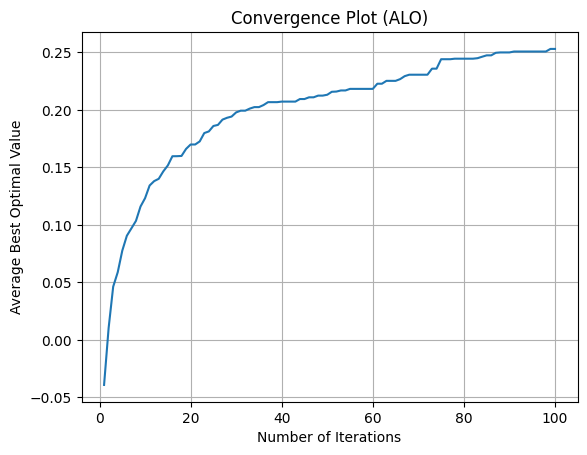

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and objective functions
vishnu = 0  # Example value

c1 = 336.5140  # Example constant values
c2 = 0.8789
c3 = 21.6165
c4 = 37.7269
c5 = 513.2847
c6 = 1197.9836

def switch_vishnu(vishnu):
    switch_dict = {
        0: (1/6, 1/6, 1/6, 1/6, 1/6, 1/6),
        1: (1, 0, 0, 0, 0, 0),
        2: (0, 1, 0, 0, 0, 0),
        3: (0, 0, 1, 0, 0, 0),
        4: (0, 0, 0, 1, 0, 0),
        5: (0, 0, 0, 0, 1, 0),
        6: (0, 0, 0, 0, 0, 1)
    }

    return switch_dict.get(vishnu, (0, 0, 0, 0, 0, 0))

w1, w2, w3, w4, w5, w6 = switch_vishnu(vishnu)

def objective_function(x):
    Toff, Ton, Sv, Ip = x
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip

    if vishnu == 0:
        optimal = - w1 * KW / c1 + w2 * PCV / c2 - w3 * SR / c3 - w4 * ED / c4 - w5 * LE / c5 - w6 * CE / c6
    else:
        optimal = - w1 * KW + w2 * PCV - w3 * SR - w4 * ED - w5 * LE - w6 * CE
    return  optimal

# Define bounds for variables
lower_bound = np.array([51, 5, 40, 70])
upper_bound = np.array([63, 25, 80, 150])

# Antlion Optimization Algorithm
def ALO(num_iterations):
    num_agents = 10
    num_variables = len(lower_bound)

    best_solution = None
    best_optimal = float('-inf')
    best_optimal_history = []

    for _ in range(num_iterations):
        # Initialize antlion positions
        antlion_positions = np.random.uniform(lower_bound, upper_bound, size=(num_agents, num_variables))

        # Evaluate objective values for each antlion
        objective_values = np.array([objective_function(pos) for pos in antlion_positions])

        # Update best solution and optimal value
        local_best_index = np.argmax(objective_values)
        if objective_values[local_best_index] > best_optimal:
            best_solution = antlion_positions[local_best_index]
            best_optimal = objective_values[local_best_index]

        # Update the position of each antlion
        for i in range(num_agents):
            # Compute distance to the best solution
            distance_to_best = np.linalg.norm(best_solution - antlion_positions[i])

            # Compute the scaling factor
            scale_factor = np.exp(-distance_to_best)

            # Update the position of the antlion
            antlion_positions[i] += scale_factor * np.random.uniform(-1, 1, size=num_variables)

        # Append the best optimal value to history
        best_optimal_history.append(best_optimal)

    return best_solution, best_optimal, best_optimal_history

# Run ALO 30 times and collect results
num_runs = 30
num_iterations = 100
best_solution_sum = np.zeros(len(lower_bound))
best_optimal_sum = 0.0
best_optimal_history_sum = np.zeros(num_iterations)

for _ in range(num_runs):
    best_solution, best_optimal, best_optimal_history = ALO(num_iterations)
    best_solution_sum += best_solution
    best_optimal_sum += best_optimal
    best_optimal_history_sum += np.array(best_optimal_history)

# Calculate averages
average_best_solution = best_solution_sum / num_runs
average_best_optimal = best_optimal_sum / num_runs
average_best_optimal_history = best_optimal_history_sum / num_runs

# Print or use the averages as needed
print("Average Best Solution:", average_best_solution)
print("Average Best Optimal:", average_best_optimal)
print("Average Best Optimal History:", average_best_optimal_history)

# Plot the average best optimal value over iterations
plt.plot(range(1, num_iterations + 1), average_best_optimal_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Average Best Optimal Value')
plt.title('Convergence Plot (ALO)')
plt.grid(True)
plt.show()